In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
def combineN(flist):
    flist=["/home/bo/"+u for u in flist]
    subs=0
    for u in flist:
        print u
        subs=subs+ pd.read_csv(u,index_col=0)  
    return subs/float(len(flist))

def combine3(f1,f2,f3):
    f1="/home/bo/"+f1
    f2="/home/bo/"+f2
    f3="/home/bo/"+f3    
    sub1=pd.read_csv(f1,index_col=0)
    sub2=pd.read_csv(f2,index_col=0).loc[sub1.index]
    sub3=pd.read_csv(f3,index_col=0).loc[sub1.index]    
    print sub1[sub1['Visits']<=0].mean(),sub1[sub1['Visits']==0].mean()
    print sub2[sub2['Visits']<=0].mean(),sub2[sub2['Visits']==0].mean()
    print sub3[sub2['Visits']<=0].mean(),sub3[sub2['Visits']==0].mean()
    
    print np.corrcoef(sub1.Visits.values,sub2.Visits.values)
    print np.corrcoef(sub1.Visits.values,sub3.Visits.values)
    print np.corrcoef(sub2.Visits.values,sub3.Visits.values)

    
    sub=(sub1+sub2+sub3)/3.0
    return sub
def combine2(f1,f2):
    f1="/home/bo/"+f1
    f2="/home/bo/"+f2
    sub1=pd.read_csv(f1,index_col=0)
    sub2=pd.read_csv(f2,index_col=0).loc[sub1.index]
    print sub1[sub1['Visits']<=0].mean(),sub1[sub1['Visits']==0].mean()
    print sub2[sub2['Visits']<=0].mean(),sub2[sub2['Visits']==0].mean()
    print np.corrcoef(sub1.Visits.values,sub2.Visits.values)
    sub=(sub1+sub2)/2.0
    return sub

In [4]:
sub=combine3('sub_pred_lstm1_60_512_nozero_xnopad.csv.gz',
             'sub_pred_lstm1_60_512_nozero_halfxzero.csv.gz',
             'sub_pred_lstm1_60_512x3_nozero_xnopad.csv.gz',
             )

Visits   -1.2
dtype: float64 Visits    0.0
dtype: float64
Visits   -1.15
dtype: float64 Visits   NaN
dtype: float64
Visits    106.95
dtype: float64 Visits   NaN
dtype: float64
[[ 1.          0.99078449]
 [ 0.99078449  1.        ]]
[[ 1.          0.99031074]
 [ 0.99031074  1.        ]]
[[ 1.          0.98919536]
 [ 0.98919536  1.        ]]


In [3]:
sub=combineN(['sub_pred_lstm1_60_medadj.csv.gz','sub_pred_lstm1log_60.csv.gz','combine_HIF.csv.gz'
             ,'sub_pred_lstm1_60_mad.csv.gz','sub_pred_lstm1_60.csv.gz'])

/home/bo/sub_pred_lstm1_60_medadj.csv.gz
/home/bo/sub_pred_lstm1log_60.csv.gz
/home/bo/combine_HIF.csv.gz
/home/bo/sub_pred_lstm1_60_mad.csv.gz
/home/bo/sub_pred_lstm1_60.csv.gz


In [7]:
sub=combine2('sub_pred_xgb_mix2.csv.gz','sub_pred_xgb_mix1.csv.gz')

Visits   NaN
dtype: float64 Visits   NaN
dtype: float64
Visits   NaN
dtype: float64 Visits   NaN
dtype: float64
[[ 1.          0.99860825]
 [ 0.99860825  1.        ]]


In [11]:
sub=combine3('sub_pred_lstm1_60_medadj60_nozero_noxpad.csv.gz','sub_pred_lstm1_60_medadj_nozero_noxpad.csv.gz','sub_pred_lstm1_60_medadj30_nozero_noxpad.csv.gz')

Visits   -94.515385
dtype: float64 Visits    0.0
dtype: float64
Visits   -1352.910692
dtype: float64 Visits   NaN
dtype: float64
Visits    9080.906289
dtype: float64 Visits   NaN
dtype: float64
[[ 1.          0.99888905]
 [ 0.99888905  1.        ]]
[[ 1.          0.99860628]
 [ 0.99860628  1.        ]]
[[ 1.          0.99787817]
 [ 0.99787817  1.        ]]


In [4]:
sub=combineN(['combine_HIF.csv.gz','sub_pred_lstm1_60.csv.gz','combine_KLM.csv.gz','combine_UV.csv.gz'])

/home/bo/combine_HIF.csv.gz
/home/bo/sub_pred_lstm1_60.csv.gz
/home/bo/combine_KLM.csv.gz
/home/bo/combine_UV.csv.gz


In [3]:
sub=pd.read_csv("/home/bo/med123_union_t.csv.gz",index_col=0)

In [5]:
sub=np.round(sub,0)

In [7]:
sub.to_csv('/home/bo/med123_union_t_round0.csv.gz',compression='gzip', float_format="%.1f")

In [9]:
sub.isnull().sum()

Visits    0
dtype: int64

In [10]:
sub.head()

Visits
Id                  
ff8c1aade3de   19.40
3da6fd5b23c1   20.45
cd9e83803be4    5.80
65cd4af0968c   14.35
75bae1fb2637   10.80

In [66]:
prob=pd.read_csv('/home/bo/zeropred_lstm_60.csv.gz',index_col=0)

In [68]:
prob.shape

(8703780, 1)

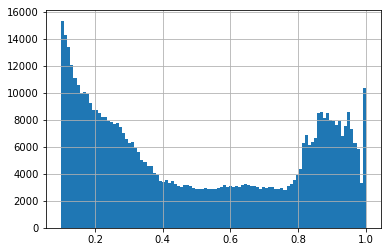

In [71]:
prob.prob[prob.prob>0.1].hist(bins=100);

In [46]:
prob=pd.read_csv('../submission/zeropred_xgb_mix12.csv.gz',index_col=0)

In [47]:
prob.shape

(8703780, 1)

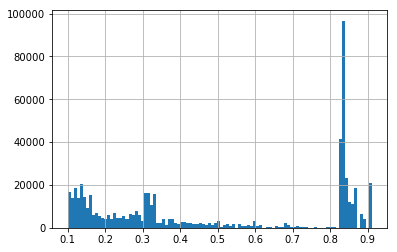

In [48]:
prob.prob[prob.prob>0.1].hist(bins=100);

In [49]:
sub4=pd.read_csv('/home/bo/med123.csv.gz',index_col=0)

In [62]:
a=prob[prob.prob>0.9]
np.mean(prob.prob>0.9),a.shape

(0.0023920641376505378, (20820, 1))

In [59]:
sub4.loc[a.index,'Visits']=0

In [60]:
(sub4<=0).mean()

Visits    0.008101
dtype: float64

In [61]:
sub4.to_csv('/home/bo/med123_xgbzero.csv.gz',compression='gzip')

In [107]:
0.009169, 0.3/200

(0.009169, 0.0015)

In [12]:
!ls /home/bo/ab*.gz /home/bo/*.gz |grep  nozero

/home/bo/clustifier_weekend_mad.nozero.csv.gz
/home/bo/clustifier_weekend_mad_nozero.gz
/home/bo/sub_pred_60i_nozero.csv.gz
/home/bo/sub_pred_60i_nozero_pth82.csv.gz
/home/bo/sub_pred_60i_nozero_pth86.csv.gz
/home/bo/sub_pred_60i_nozero_pth90.csv.gz
/home/bo/sub_pred_60i_nozero_pth94.csv.gz


In [6]:
files=['sub_pred_lstm1_60_512_nozero_xnopad.csv.gz',
             'sub_pred_lstm1_60_512_nozero_halfxzero.csv.gz',
             'sub_pred_lstm1_60_512x3_nozero_xnopad.csv.gz',
"sub_pred_lstm1_60_1024_nozero.csv.gz"]
df=pd.concat([pd.read_csv("/home/bo/"+u,index_col=0) for u in files],axis=1)
df.columns=[u.split('/')[-1].split('.')[0] for u in files]
np.round(df.corr(),3)*100

sub_pred_lstm1_60_512_nozero_xnopad  \
sub_pred_lstm1_60_512_nozero_xnopad                                   100.0   
sub_pred_lstm1_60_512_nozero_halfxzero                                 99.1   
sub_pred_lstm1_60_512x3_nozero_xnopad                                  99.0   
sub_pred_lstm1_60_1024_nozero                                          98.8   

                                        sub_pred_lstm1_60_512_nozero_halfxzero  \
sub_pred_lstm1_60_512_nozero_xnopad                                       99.1   
sub_pred_lstm1_60_512_nozero_halfxzero                                   100.0   
sub_pred_lstm1_60_512x3_nozero_xnopad                                     98.9   
sub_pred_lstm1_60_1024_nozero                                             99.1   

                                        sub_pred_lstm1_60_512x3_nozero_xnopad  \
sub_pred_lstm1_60_512_nozero_xnopad                                      99.0   
sub_pred_lstm1_60_512_nozero_halfxzero                                   98.9   
sub_pred_lstm1_60_512x3_nozero_xnopad                                   100.0   
sub_pred_lstm1_60_1024_nozero                                            98.7   

                                        sub_pred_lstm1_60_1024_nozero  
sub_pred_lstm1_60_512_nozero_xnopad                              98.8  
sub_pred_lstm1_60_512_nozero_halfxzero                           99.1  
sub_pred_lstm1_60_512x3_nozero_xnopad                            98.7  
sub_pred_lstm1_60_1024_nozero                                   100.0

In [44]:
files=[ '/home/bo/sub_pred_60i_nozero.csv.gz',
      '/home/bo/sub_pred_lstm1_60.csv.gz', '/home/bo/sub_pred_lstm1_60_mad.csv.gz', 
       '/home/bo/sub_pred_lstm1_60_medadj.csv.gz',
      '/home/bo/sub_pred_lstm1log_60.csv.gz',
       '/home/bo/combine_HI.csv.gz']

In [45]:
df=pd.concat([pd.read_csv(u,index_col=0) for u in files],axis=1)
df.columns=[u.split('/')[-1].split('.')[0] for u in files]

In [46]:
np.round(df.corr(),3)*100

sub_pred_60i_nozero  sub_pred_lstm1_60  \
sub_pred_60i_nozero                     100.0               97.8   
sub_pred_lstm1_60                        97.8              100.0   
sub_pred_lstm1_60_mad                    94.4               95.8   
sub_pred_lstm1_60_medadj                  6.2                6.2   
sub_pred_lstm1log_60                      8.7                8.7   
combine_HI                                6.8                6.7   

                          sub_pred_lstm1_60_mad  sub_pred_lstm1_60_medadj  \
sub_pred_60i_nozero                        94.4                       6.2   
sub_pred_lstm1_60                          95.8                       6.2   
sub_pred_lstm1_60_mad                     100.0                       9.1   
sub_pred_lstm1_60_medadj                    9.1                     100.0   
sub_pred_lstm1log_60                       12.3                      96.7   
combine_HI                                  9.7                      99.6   

                          sub_pred_lstm1log_60  combine_HI  
sub_pred_60i_nozero                        8.7         6.8  
sub_pred_lstm1_60                          8.7         6.7  
sub_pred_lstm1_60_mad                     12.3         9.7  
sub_pred_lstm1_60_medadj                  96.7        99.6  
sub_pred_lstm1log_60                     100.0        97.7  
combine_HI                                97.7       100.0

In [45]:
sub2=pd.read_csv('/home/bo/clustifier_weekend_mad.csv.gz',index_col=0)
(sub2==0).sum(),(sub2<=0).sum(),(sub2<=0).mean(),sub2.shape

(Visits    178566
 dtype: int64, Visits    178566
 dtype: int64, Visits    0.020516
 dtype: float64, (8703780, 1))

In [63]:
(sub2<=0.5).mean()

Visits    0.021364
dtype: float64

In [14]:
sub33=pd.read_csv('/home/bo/sub_pred_lstm1_60.csv.gz',index_col=0)
(sub33<0.5).sum(),(sub33<=0).sum()

(Visits    273446
 dtype: int64, Visits    21
 dtype: int64)

In [15]:
sub2[sub2.Visits>0].min()

Visits    0.5
dtype: float64

In [16]:
sub3=pd.read_csv('/home/bo/sub_pred_60im.csv.gz',index_col=0)
(sub3==0).sum(),(sub3<=0).sum()

(Visits    128313
 dtype: int64, Visits    128313
 dtype: int64)

In [17]:
sub3[sub3.Visits>0].min()

Visits    0.5
dtype: float64

In [18]:
a=set(sub3[sub3.Visits<0.5].index)
b=set(sub2[sub2.Visits==0].index)
c=set(sub33[sub33.Visits<0.5].index)

print len(a),len(b),len(c)

128313 178566 273446


In [39]:
len(a.union(b) ),len(a.intersection(b).intersection(c) ) 

(223260, 83106)

In [34]:
83619./sub3.shape[0],223260./sub3.shape[0],238331./sub3.shape[0]

(0.00960720514535064, 0.025650924081261246, 0.02738247060472576)

In [19]:
sub4=pd.read_csv('/home/bo/med123.csv.gz',index_col=0)

In [20]:
(sub4<=0).sum()

Visits    13
dtype: int64

In [21]:
sub4.loc[(b)]=0

In [22]:
(sub4<=0).sum()

Visits    178579
dtype: int64

In [23]:
sub4.to_csv('/home/bo/med123_union_t.csv.gz',compression='gzip')

In [49]:
sub4=pd.read_csv('/home/bo/combine_SOP_union_tf.csv.gz',index_col=0)

In [16]:
a=set(sub3[sub3.Visits>=0.5][sub3.Visits<=1].index)
b=set(sub2[sub2.Visits>=0.5][sub2.Visits<=1].index)
c=set(sub33[sub33.Visits>=0.5][sub33.Visits<=1].index)
d=set(sub4[sub4.Visits==0.0].index)

print len(a),len(b),len(c),len(d)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


69478 190858 65527 223260


In [52]:
(285916.-223265)/sub3.shape[0]

0.007198136901438226

In [53]:
len(a.union(b).union(c).difference(d) ),len(a.intersection(b).intersection(c).difference(d) ) 

(179781, 14774)

In [18]:
179785./sub3.shape[0]

0.02065596786683487

In [17]:
e=a.union(b).union(c).difference(d)
x=sub4.loc[e]
len(e)

179785

In [19]:
np.sum(np.abs(x-1)/(np.abs(x)+1)*200)/sub4.shape[0]

Visits    0.750844
dtype: float64

In [20]:
sub4.loc[e]=1

In [21]:
np.mean(sub4.Visits==1),np.mean(sub4.Visits<=0),

(0.020750869162593725, 0.025651498544310633)

In [22]:
sub4.to_csv('/home/bo/combine_SOPT_union_tf_1adj.csv.gz',compression='gzip')

In [31]:
a=pd.read_csv('/home/bo/boosted_tree_sub_ols.csv.gz')
b=a.values[:,2]
np.mean(b),np.median(b)

(0.011710930897150862, 0.010800000000000001)

In [32]:
a=pd.read_csv('/home/bo/boosted_tree_sub_lightgbm.csv.gz')
b=a.values[:,2]
np.mean(b),np.median(b)

(0.012386923563680624, 0.0109)

In [41]:
a=pd.read_csv('/home/bo/boosted_tree_sub_xgb1.csv.gz')
b=a.values[:,2]
np.mean(b),np.median(b)

(0.010177211204411618, 0.0091999999999999998)

In [42]:
a=pd.read_csv('/home/bo/boosted_tree_sub_xgb2.csv.gz')
b=a.values[:,2]
np.mean(b),np.median(b)

(0.0097588034303703833, 0.0088999999999999999)

In [43]:
a=pd.read_csv('/home/bo/sample_submission.csv.zip')
b=a.values[:,2]
np.mean(b),np.median(b)

(0.0, 0.0)

In [33]:
a=pd.read_csv('/home/bo/xgb_simple.csv.gz')
b=a.values[:,2]
np.mean(b),np.median(b)

(0.012330328850465469, 0.0099000000000000008)

In [39]:
a=pd.read_csv('/home/bo/z_xgb_starter.csv.gz')
b=a.values[:,2]
np.mean(b),np.median(b)

(0.014744785554952955, 0.0114)

In [40]:
a=pd.read_csv('/home/bo/sub20170817_061736.csv.gz')
b=a.values[:,2]
np.mean(b),np.median(b)

(0.012006026932045475, 0.010699999999999999)

In [36]:
0.0109-0.01

0.0008999999999999998

In [37]:
0.0646-0.0008999999999999998

0.0637